In [13]:
# Load the data set
library(gamair)
library(scales)
data(chicago)

In [14]:
head(chicago)

death pm10median pm25median o3median  so2median  time    tmpd
1 130   -7.4335443 NA         -19.59234  1.9280426 -2556.5 31.5
2 150           NA NA         -19.03861 -0.9855631 -2555.5 33.0
3 101   -0.8265306 NA         -20.21734 -1.8914161 -2554.5 33.0
4 135    5.5664557 NA         -19.67567  6.1393413 -2553.5 29.0
5 126           NA NA         -19.21734  2.2784649 -2552.5 32.0
6 130    6.5664557 NA         -17.63400  9.8585839 -2551.5 40.0

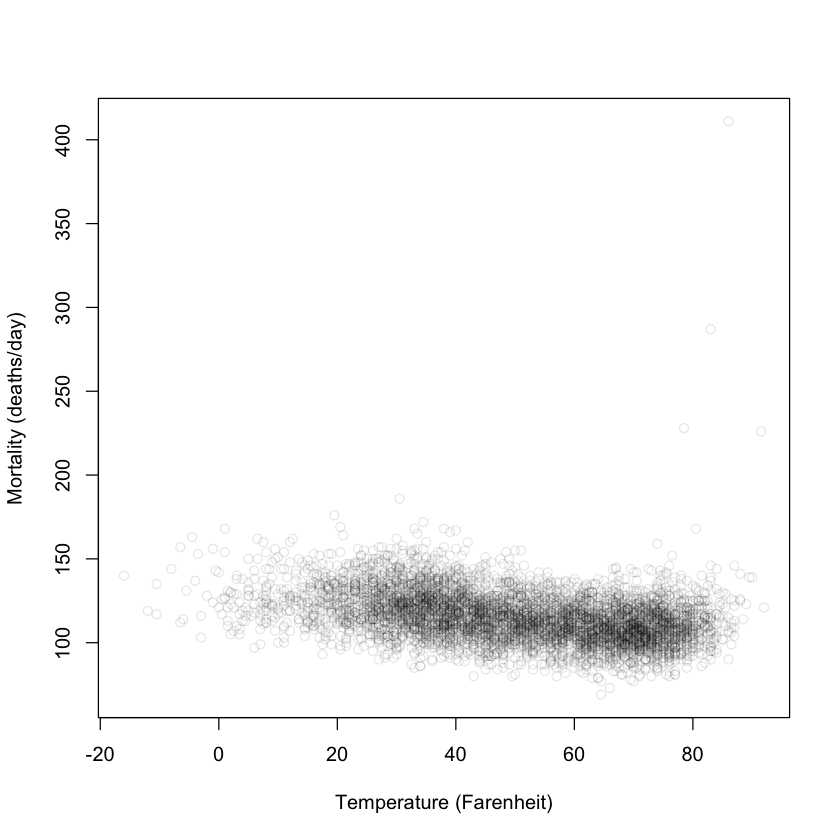

In [15]:
# Plot deaths each day vs. temperature
plot(death ~ tmpd, data=chicago,
     xlab="Temperature (Farenheit)",
     ylab="Mortality (deaths/day)",
     col = alpha('black', 0.1))

In [16]:
# Estimate and store a linear model
death.temp.lm <- lm(death ~ tmpd, data=chicago)

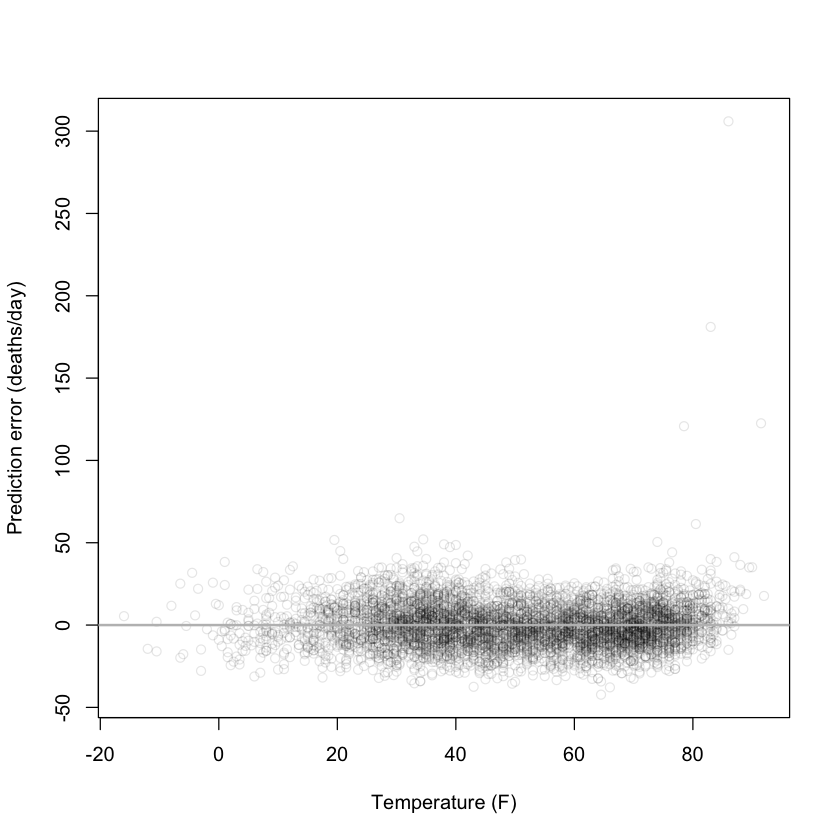

In [17]:
# Diagnostics

# Always plot residuals vs. predictor variable
plot(chicago$tmpd, residuals(death.temp.lm),
     xlab="Temperature (F)",
     ylab="Prediction error (deaths/day)",
     col = alpha('black', 0.1))
abline(h=0,lwd=2,col="grey")

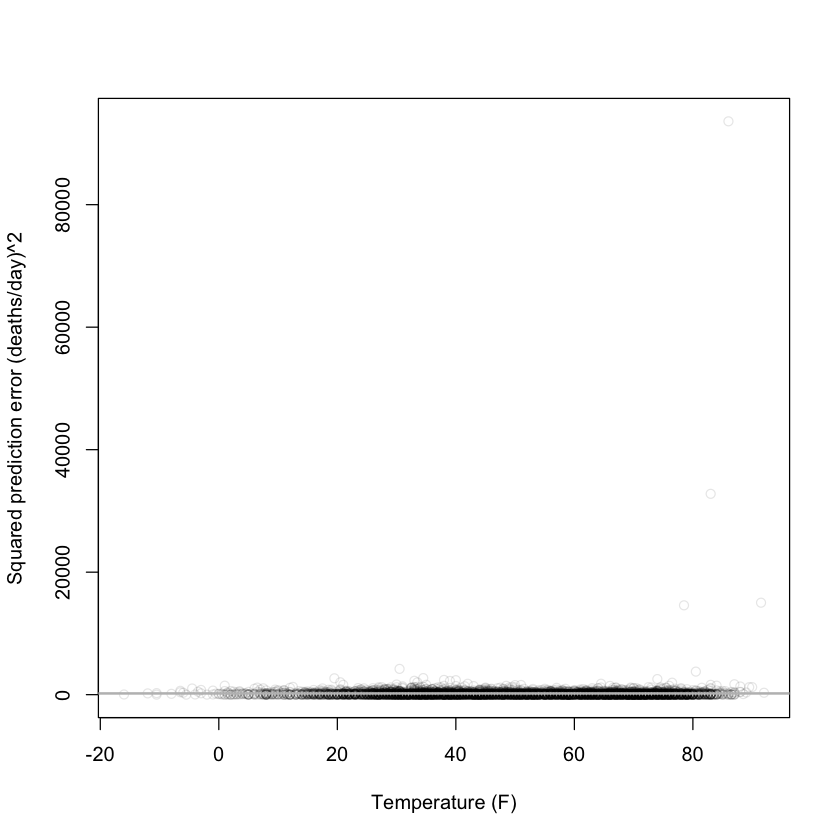

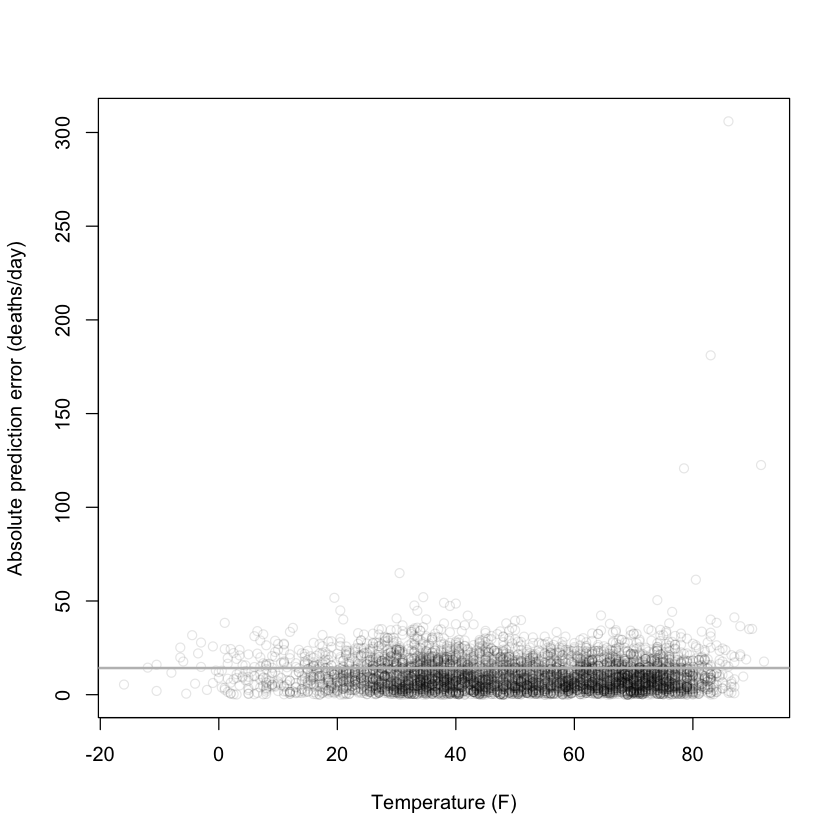

In [19]:
# Always plot residuals^2 and/or abs(residuals) vs.
# predictor variable
plot(chicago$tmpd, residuals(death.temp.lm)^2,
     xlab="Temperature (F)",
     ylab="Squared prediction error (deaths/day)^2",
     col = alpha('black', 0.1))
abline(h=mean(residuals(death.temp.lm)^2),
       lwd=2, col="grey")
plot(chicago$tmpd, abs(residuals(death.temp.lm)),
     xlab="Temperature (F)",
     ylab="Absolute prediction error (deaths/day)",
     col = alpha('black', 0.1))
abline(h=sqrt(mean(residuals(death.temp.lm)^2)),
       lwd=2, col="grey")

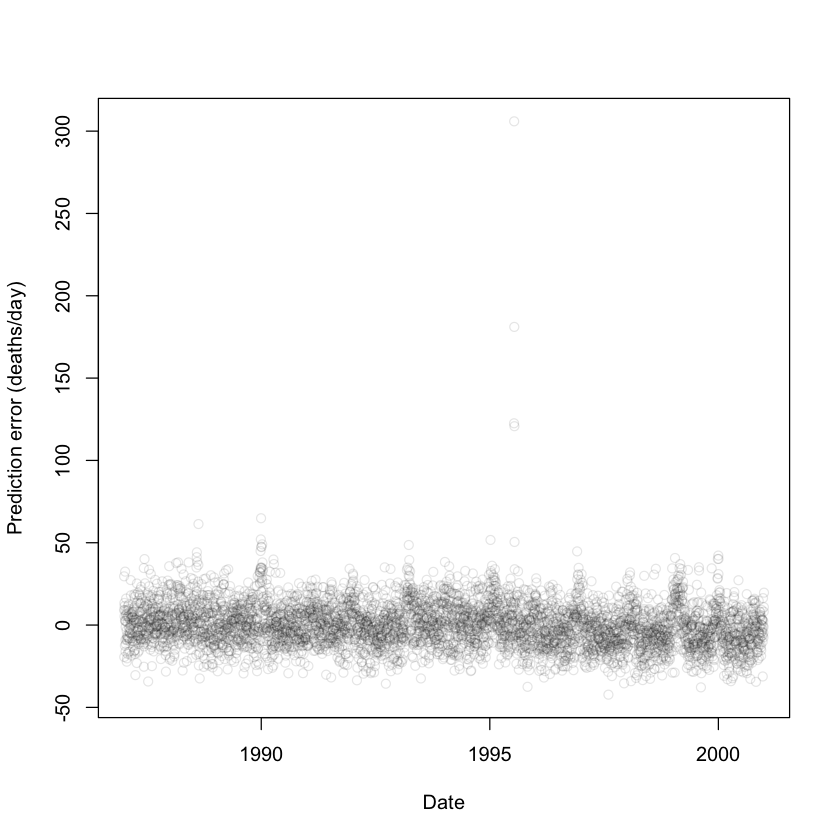

In [20]:
# Always plot residuals vs. measurement
plot(as.Date(chicago$time,origin="1993-12-31"),
     residuals(death.temp.lm), xlab="Date",
     ylab="Prediction error (deaths/day)",
     col = alpha('black', 0.1))


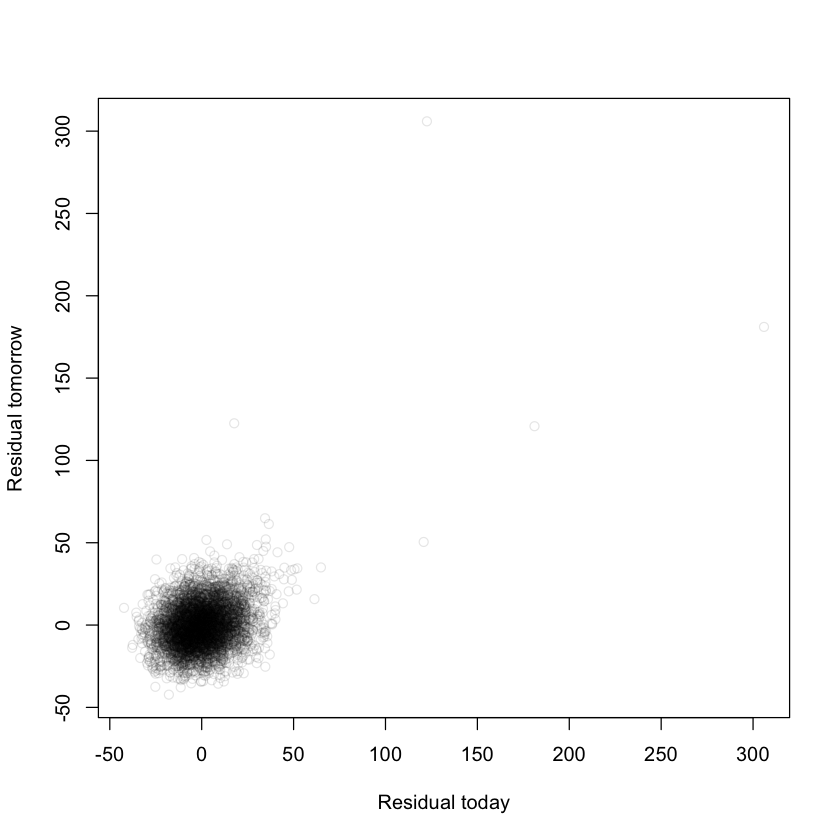

In [21]:
# Always plot successive residuals against each other
  # head() and tail() here are used to get "every day except the last"
  # and "every day except the first", respectively
  # see help(head)
plot(head(residuals(death.temp.lm),-1),
     tail(residuals(death.temp.lm),-1),
     xlab="Residual today",
     ylab="Residual tomorrow",
     col = alpha('black', 0.1))

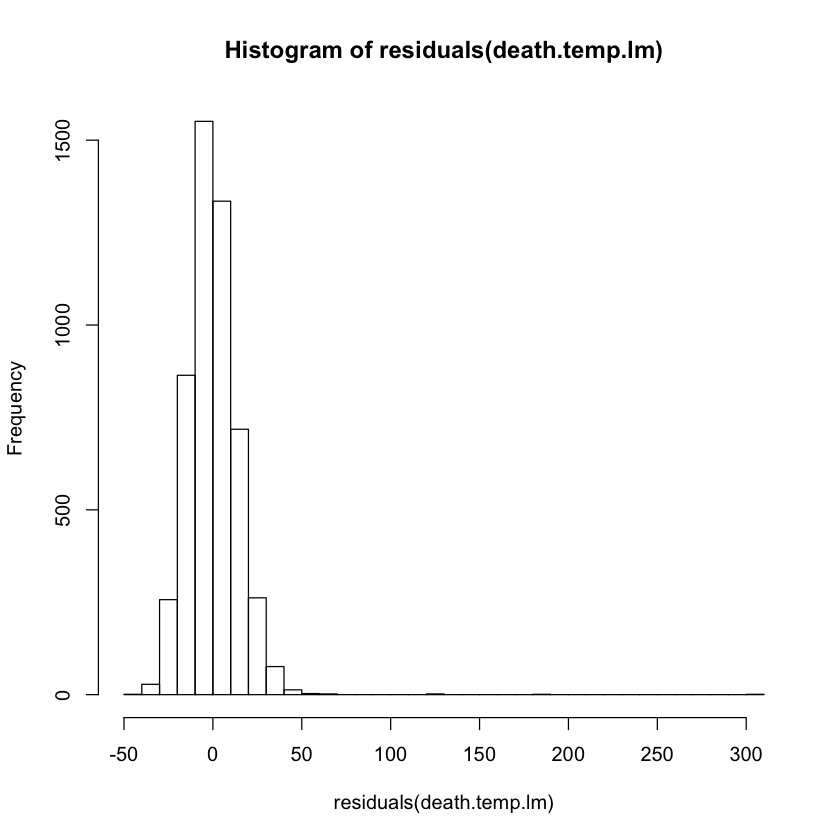

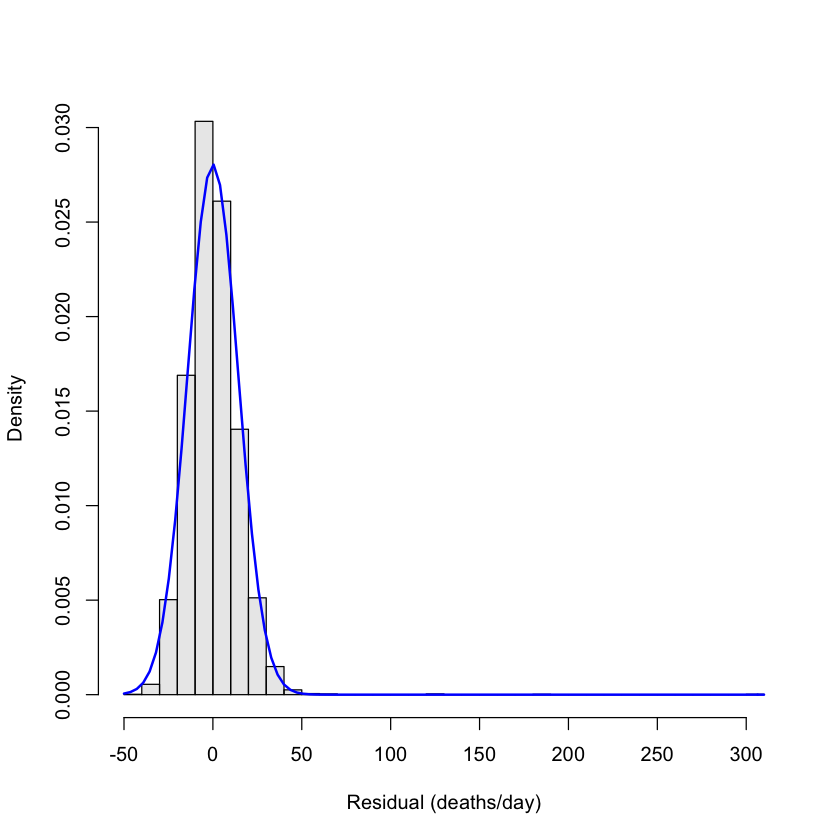

In [22]:
# Always plot distribution of residuals
plot(hist(residuals(death.temp.lm),breaks=40),
     freq=FALSE,
     xlab="Residual (deaths/day)", main="")
curve(dnorm(x,mean=0,sd=sd(residuals(death.temp.lm))),
      add=TRUE,col="blue",lwd=2)


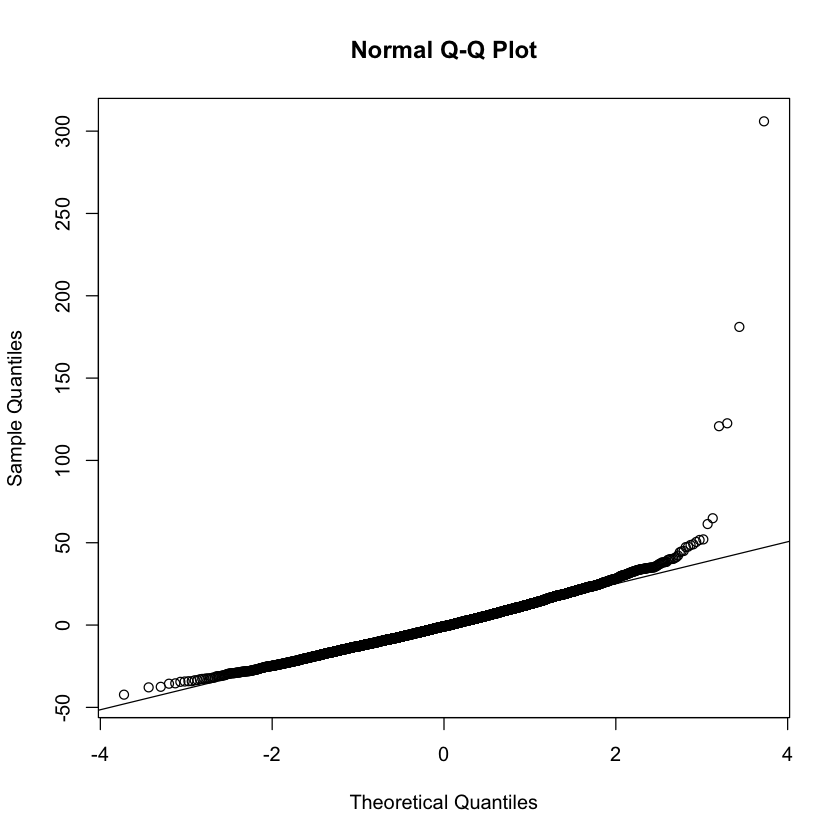

In [23]:
# An alternative: plot vs. theoretical Gaussian distribution
qqnorm(residuals(death.temp.lm))
qqline(residuals(death.temp.lm))

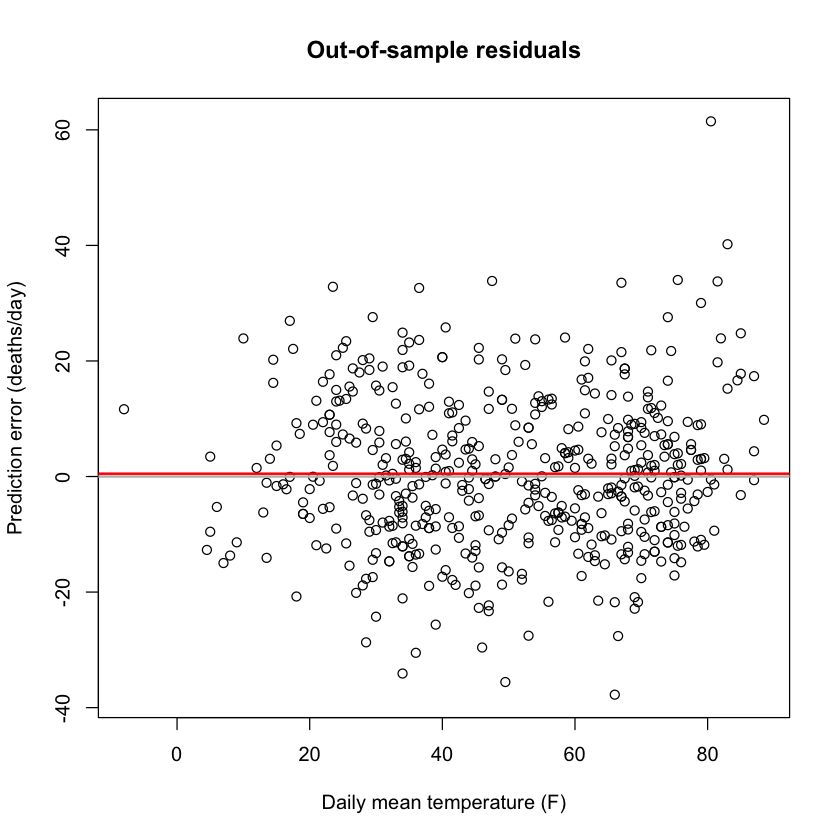

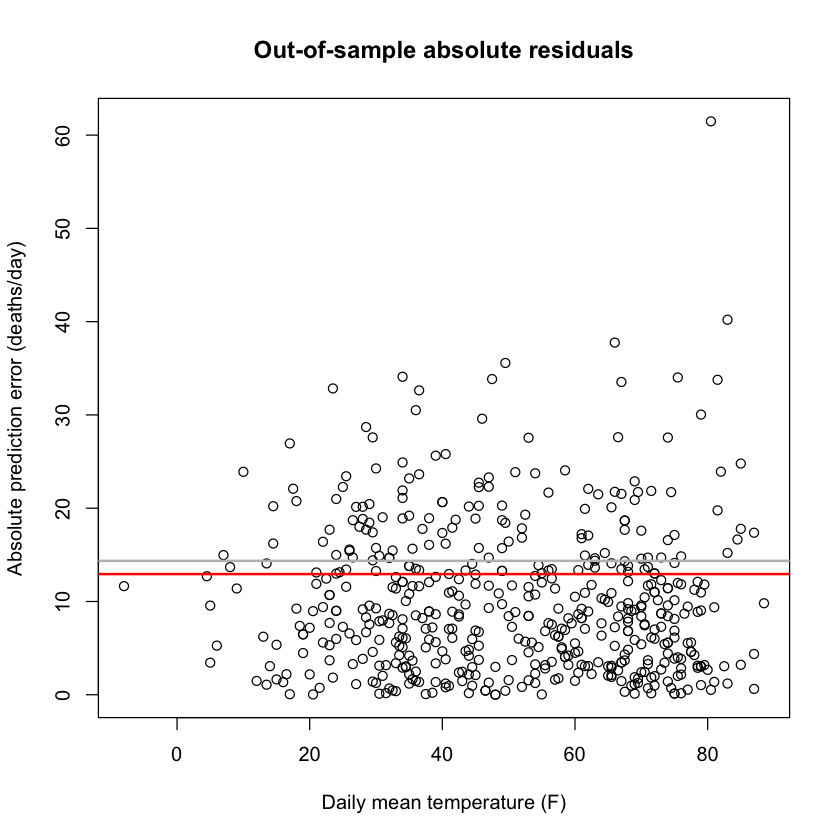

In [12]:

# Always look at whether the model can extrapolate to
# new data
# Basic check: randomly divide into two parts, here say 90% of the data
# vs. 10%
# Use the "training set" to estimate the model
training.rows <- sample(1:nrow(chicago), size=round(nrow(chicago)*0.9),
                        replace=FALSE)
training.set <- chicago[training.rows,]
# We'll use the "testing set" to see how well it does
testing.set <- chicago[-training.rows,]
# Estimate the model on the training set only
training.lm <- lm(death ~ tmpd, data=training.set)
# Make predictions on the testing set
  # The model didn't get to see these points while it was being
  # estimated, so this really checks (or tests) whether it can
  # predict
testing.preds <- predict(training.lm, newdata=testing.set)
# Unfortunately residuals() doesn't know about the new data set
# so calculate the residuals by hand
testing.residuals <- testing.set$death-testing.preds
# Plot our residuals against the predictor variable
plot(testing.set$tmpd, testing.residuals,
     xlab="Daily mean temperature (F)",
     ylab="Prediction error (deaths/day)",
     main="Out-of-sample residuals")
abline(h=0,col="grey",lwd=2)
abline(h=mean(testing.residuals),col="red",lwd=2)
# Plot absolute residuals vs. predictor variable
plot(testing.set$tmpd, abs(testing.residuals),
     xlab="Daily mean temperature (F)",
     ylab="Absolute prediction error (deaths/day)",
     main="Out-of-sample absolute residuals")
abline(h=sqrt(mean(residuals(training.lm)^2)),col="grey",lwd=2)
abline(h=sqrt(mean(testing.residuals^2)),col="red",lwd=2)
# The model is doing alright on data it hasn't seen before,
# when the testing set is chosen at random

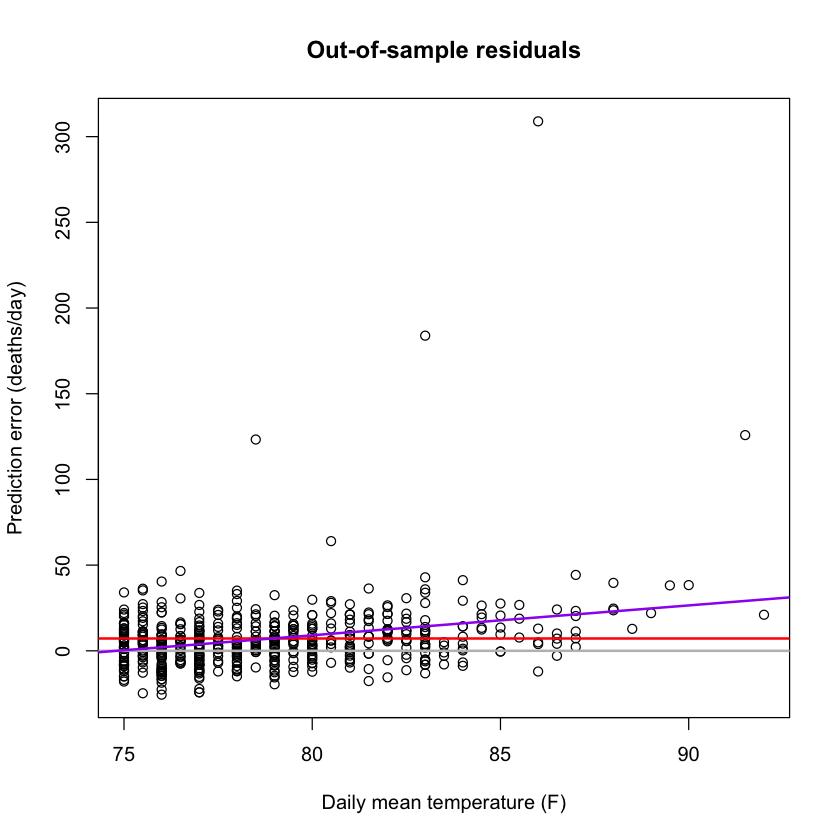

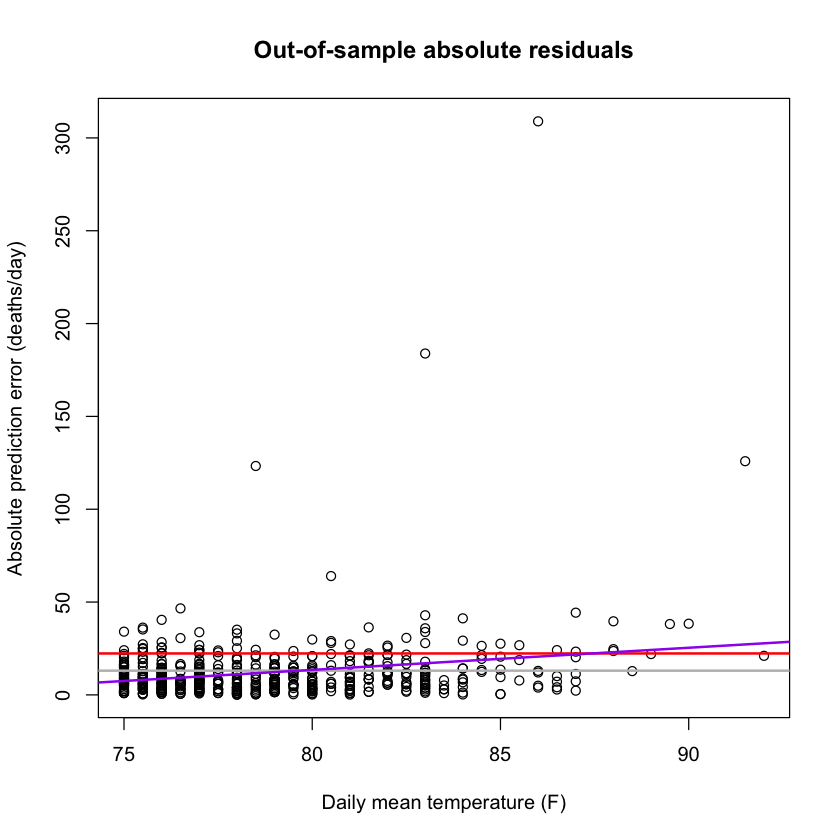

In [25]:

# From before, it looks like the really bad residuals are
# on high-temperature days
# See if the model can extrapolate from low temperature
# to high temperature --- it should be able to if the
# simple linear model is right

# Find the low-temperature days
lowtemp.rows <- which(chicago$tmpd < 75)  # About 90% of the data
# Divide into low- and high- temperature data sets
lowtemp.set <- chicago[lowtemp.rows,]
hightemp.set <- chicago[-lowtemp.rows,]
# Estimate the model on the colder days only
lowtemp.lm <- lm(death ~ tmpd, data=lowtemp.set)
   # For you: how much do the parameters change, as compared to
   # using all the data?
# Now predict on the high-temperature days
  # Again, these are new data points, but now systematically
  # different (because of their temperature) from the
  # data used to estimate
hightemp.preds <- predict(lowtemp.lm, newdata=hightemp.set)
# Calculate our own residuals
hightemp.residuals <- hightemp.set$death-hightemp.preds
# Plot residuals vs. temperature
plot(hightemp.set$tmpd, hightemp.residuals,
     xlab="Daily mean temperature (F)",
     ylab="Prediction error (deaths/day)",
     main="Out-of-sample residuals")
# Flat line at 0 (ideal, if the model is right)
abline(h=0,col="grey",lwd=2)
# Flat line at the mean of the new residuals
abline(h=mean(hightemp.residuals),col="red",lwd=2)
# Regressing the new residuals on temperature does not look good...
abline(lm(hightemp.residuals ~ hightemp.set$tmpd),col="purple",lwd=2)
# Similar plots for the absolute residuals
plot(hightemp.set$tmpd, abs(hightemp.residuals),
     xlab="Daily mean temperature (F)",
     ylab="Absolute prediction error (deaths/day)",
     main="Out-of-sample absolute residuals")
abline(h=sqrt(mean(residuals(lowtemp.lm)^2)),col="grey",lwd=2)
abline(h=sqrt(mean(hightemp.residuals^2)),col="red",lwd=2)
abline(lm(abs(hightemp.residuals) ~ hightemp.set$tmpd),col="purple",lwd=2)

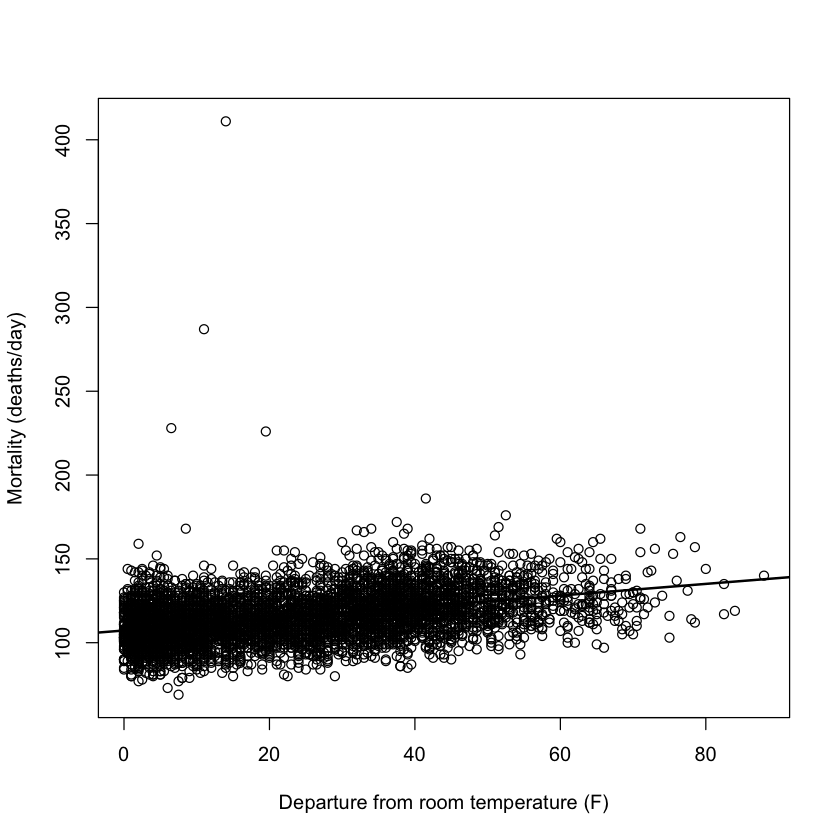

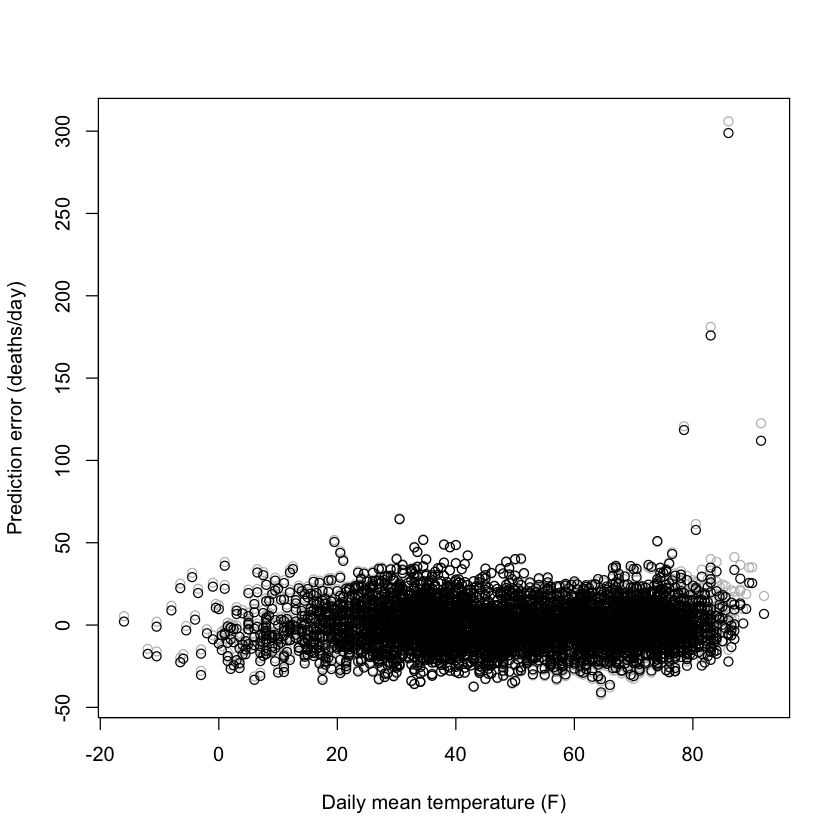

In [24]:

# A not-very-satisfactory transformation:
chicago$from.room <- abs(chicago$tmpd - 72)
plot(death ~ from.room, data=chicago,
     xlab="Departure from room temperature (F)",
     ylab="Mortality (deaths/day)")
death.from.room <- lm(death ~ from.room, data=chicago)
abline(death.from.room, lwd=2)
# How would we check this?
plot(chicago$tmpd, residuals(death.temp.lm),
     xlab="Daily mean temperature (F)",
     ylab="Prediction error (deaths/day)", col="grey")
points(chicago$tmpd, residuals(death.from.room),
       col="black")
# Can now go through the rest of the diagnostic checks
# Why do I call this a not-very-satisfactory transformation?